### L1 Regularization Demonstration
To demonstrate the use of L1 regularization, we are going to generate some data where the input is a fat matrix and y will only depend on a few of the features, the rest of them will just be noise. Then we will use L1 regularization to find a sparse set of weights that identify the useful dimensions of that.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# set up a fat matrix
# generate a matrix with elements values in the inverval [-5.0, 5.0)
N = 50
D = 50
X = np.random.random((N, D))*10 - 5
X

array([[-2.92499217,  2.5976741 , -3.09852353, ..., -2.73412069,
        -2.0105787 , -0.86305097],
       [-1.09665229,  4.19034468, -3.35510542, ...,  2.97867656,
         3.58489436, -2.90668015],
       [ 2.14856264, -3.55195532,  3.36126474, ...,  4.19189265,
         0.34417979,  4.60546745],
       ...,
       [-0.01324745, -2.48132243,  3.1417616 , ..., -4.34380184,
        -2.34274487, -3.07668301],
       [-4.01137184, -1.22360047,  4.47396853, ..., -4.81031778,
        -0.23357178,  0.24139307],
       [ 0.56501499, -3.78036664,  4.10884906, ..., -1.92598958,
        -3.78736588,  4.78275154]])

In [9]:
# set up the important features in the way that
# only the first three features influence the output
true_w = np.array([1, 0.5, -0.5] + [0]*(D-3))

In [10]:
true_w

array([ 1. ,  0.5, -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [16]:
# Set up the target Y
# Y = Xw + epsilon, where epsilon ~ N(0, var)
# the Gaussian noise is the assumption when doing linear regression of
# mu of 0, and variance 0.25 (0.5 is sigma - the standard deviation) 
Y = X.dot(true_w) + np.random.randn(N)*0.5

In [27]:
# Perform the gradient descent
# initial setup
costs = []                          # for storing the mse to plot
w = np.random.randn(D) / np.sqrt(D) # initialize the random weight, so that w ~ N(0, 1/D)
learning_rate = 0.001               # set up the hyperparameter
l1 = 10.0                           # set up the L1 penalty term, the lambda

In [28]:
# do the iterations:
for t in range(500):
    Yhat = X.dot(w)     # get the prediction
    delta = Yhat - Y    # get the difference    
    gradient = X.T.dot(delta) + l1*np.sign(w) # compute the gradient
    w = w - learning_rate * gradient          # update the weights
    mse = delta.dot(delta) / N                # compute mse
    costs.append(mse)

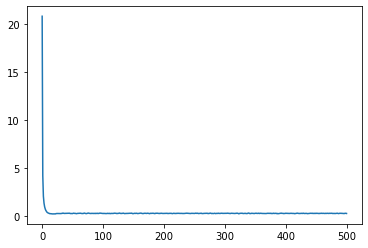

In [30]:
# plot the costs
# seems don't need 500 epochs
plt.plot(costs);

In [31]:
# print the final weights
w

array([ 9.19575193e-01,  4.06455559e-01, -4.17803161e-01, -6.89193704e-03,
        1.36390975e-03,  1.40725794e-02, -1.43302795e-02, -2.40926708e-02,
        1.27872257e-02, -5.63608482e-03, -1.11381090e-02, -1.38647173e-02,
       -7.13731127e-03, -1.26557041e-02,  1.52014698e-02, -9.58838715e-03,
        8.47480779e-04,  2.36304987e-02, -7.72709443e-03, -1.77765880e-02,
       -6.29726431e-03,  5.17537243e-03, -2.81952774e-03,  1.92727038e-02,
        4.85519327e-04,  9.44468516e-03, -3.69170921e-03,  1.47854070e-02,
        1.92492525e-03,  1.74799981e-02, -9.48285845e-04, -1.51113580e-02,
        1.61681579e-02, -1.09748450e-02,  1.39741475e-02,  1.73950912e-03,
       -9.22111301e-03, -4.24247010e-03, -3.18250419e-02, -7.93972894e-04,
       -3.25793859e-03,  2.29935382e-02, -1.47156428e-02,  2.10778384e-02,
       -8.91985114e-03,  1.33932673e-02,  2.18079493e-02, -2.52490959e-02,
       -2.85932707e-03, -1.09197169e-02])

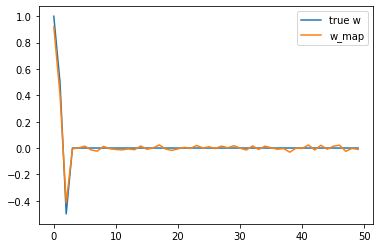

In [34]:
# compare the w's we found with the true weights, true_w
# very similar, proves the effectiveness of L1 regularization
plt.plot(true_w, label='true w');
plt.plot(w, label='w_map')
plt.legend();